## import Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training image preprocessing

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### validation image preprocessing

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None
    ,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [10]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

#### To avoid Overshooting Loss function


In [12]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[163.5  155.5  166.5 ]
   [161.5  153.5  164.5 ]
   [161.75 153.75 164.75]
   ...
   [129.25 118.25 122.25]
   [119.75 108.75 112.75]
   [116.75 105.75 109.75]]

  [[163.75 155.75 166.75]
   [162.5  154.5  165.5 ]
   [162.5  154.5  165.5 ]
   ...
   [115.5  104.5  108.5 ]
   [112.25 101.25 105.25]
   [110.75  99.75 103.75]]

  [[162.   154.   165.  ]
   [161.5  153.5  164.5 ]
   [160.5  152.5  163.5 ]
   ...
   [113.75 102.75 106.75]
   [110.75  99.75 103.75]
   [119.25 108.25 112.25]]

  ...

  [[156.5  145.5  153.5 ]
   [153.25 142.25 150.25]
   [149.   138.   146.  ]
   ...
   [ 90.75  79.75  75.75]
   [ 94.25  83.25  79.25]
   [ 97.    86.    82.  ]]

  [[149.75 138.75 146.75]
   [152.   141.   149.  ]
   [148.   137.   145.  ]
   ...
   [ 88.5   77.5   73.5 ]
   [ 88.    77.    73.  ]
   [ 87.75  76.75  72.75]]

  [[150.75 139.75 147.75]
   [151.25 140.25 148.25]
   [150.5  139.5  147.5 ]
   ...
   [ 87.25  76.25  72.25]
   [ 85.5   74.5   70.5 ]
   [ 84.5   73.5   6

##### 1.Choose small learning rate default 0.001 here we have taken 0.0001
#### 2. There may be chance of underfitting so increase number of neuron
#### 3.Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model


In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [80]:
model = Sequential()

### Building Convolution Layer


In [82]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [84]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [86]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [88]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [90]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [92]:
model.add(Dropout(0.25))

In [94]:
model.add(Flatten())

In [96]:
model.add(Dense(units=1500,activation='relu'))

In [98]:
model.add(Dropout(0.4)) # avoid over fiting

In [100]:
#output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling and Training Phase

In [105]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [107]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [111]:
training_history = model.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=10

)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1367s 620ms/step - accuracy: 0.1834 - loss: 2.9839 - val_accuracy: 0.6875 - val_loss: 0.9886
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1338s 609ms/step - accuracy: 0.6884 - loss: 0.9892 - val_accuracy: 0.7947 - val_loss: 0.6230
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1497s 682ms/step - accuracy: 0.7825 - loss: 0.6787 - val_accuracy: 0.8479 - val_loss: 0.4708
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1486s 676ms/step - accuracy: 0.8208 - loss: 0.5565 - val_accuracy: 0.8450 - val_loss: 0.4836
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1431s 651ms/step - accuracy: 0.8434 - loss: 0.4880 - val_accuracy: 0.8314 - val_loss: 0.5278
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1374s 625ms/step - accuracy: 0.8504 - loss: 0.4723 - val_accuracy: 0.8693 - val_loss: 0.4087
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4024s 2s/step - accuracy: 0.8613 - loss: 0.4444 - val_accuracy: 0.8615 - val_loss: 0.4488
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1382s 629ms/step

## Model Evaluating

In [121]:
train_loss,train_acc= model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 326s 148ms/step - accuracy: 0.8993 - loss: 0.3080


In [123]:

print(train_loss,train_acc)

0.29274600744247437 0.9050003290176392


In [125]:
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 93s 169ms/step - accuracy: 0.8611 - loss: 0.4384


In [127]:
#Validation set Accuracy
print(val_loss, val_acc)

0.4317609369754791 0.864898681640625


#### Saving Model


In [129]:
model.save('trained_plant_disease_model.keras')

In [133]:
training_history.history #Return Dictionary of history


{'accuracy': [0.37530407309532166,
  0.7205206751823425,
  0.7959314584732056,
  0.8292055130004883,
  0.8471015095710754,
  0.8562913537025452,
  0.8631197214126587,
  0.8665907979011536,
  0.8713564276695251,
  0.8727079033851624],
 'loss': [2.177502155303955,
  0.8815352916717529,
  0.6405860185623169,
  0.5332967042922974,
  0.4773716330528259,
  0.4532855451107025,
  0.43665146827697754,
  0.42841339111328125,
  0.407346248626709,
  0.40508392453193665],
 'val_accuracy': [0.6874573230743408,
  0.7946733236312866,
  0.8479399085044861,
  0.845037579536438,
  0.8314363956451416,
  0.8692806959152222,
  0.861484169960022,
  0.8804916739463806,
  0.877646267414093,
  0.864898681640625],
 'val_loss': [0.9885990023612976,
  0.6230050921440125,
  0.4707877039909363,
  0.48361852765083313,
  0.5277814865112305,
  0.40867185592651367,
  0.44876596331596375,
  0.37373942136764526,
  0.3957573473453522,
  0.43176084756851196]}

In [135]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [137]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization


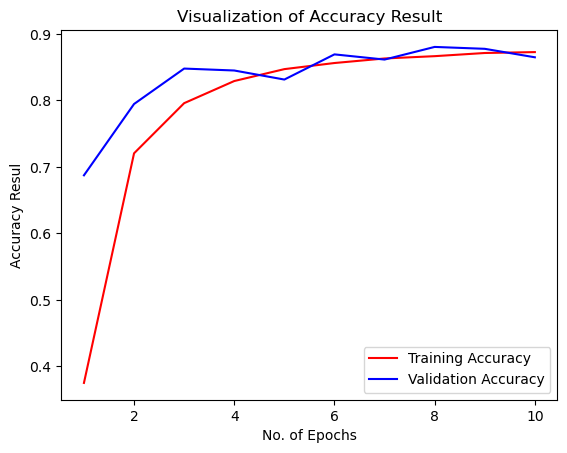

In [140]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Resul')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### Some other metrics for model evaluation


In [142]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [144]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [146]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 300s 17ms/step


In [147]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [150]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [154]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 35, 37, 37], dtype=int64)>

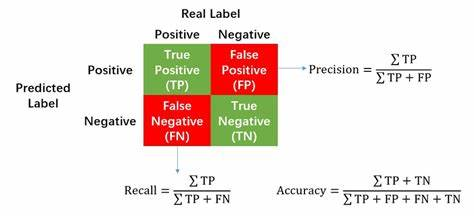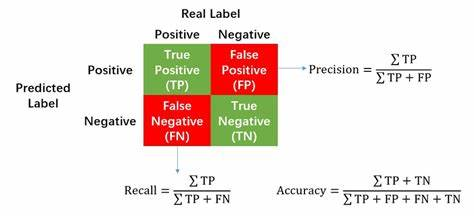

In [156]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [158]:
#Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.83      0.76      0.79       504
                                 Apple___Black_rot       0.86      0.98      0.91       497
                          Apple___Cedar_apple_rust       0.95      0.86      0.90       440
                                   Apple___healthy       0.92      0.76      0.83       502
                               Blueberry___healthy       0.85      0.91      0.88       454
          Cherry_(including_sour)___Powdery_mildew       0.93      0.94      0.93       421
                 Cherry_(including_sour)___healthy       0.93      0.95      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.88      0.88      0.88       410
                       Corn_(maize)___Common_rust_       0.99      0.98      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.90      0.

## Confusion Matrix Visualization


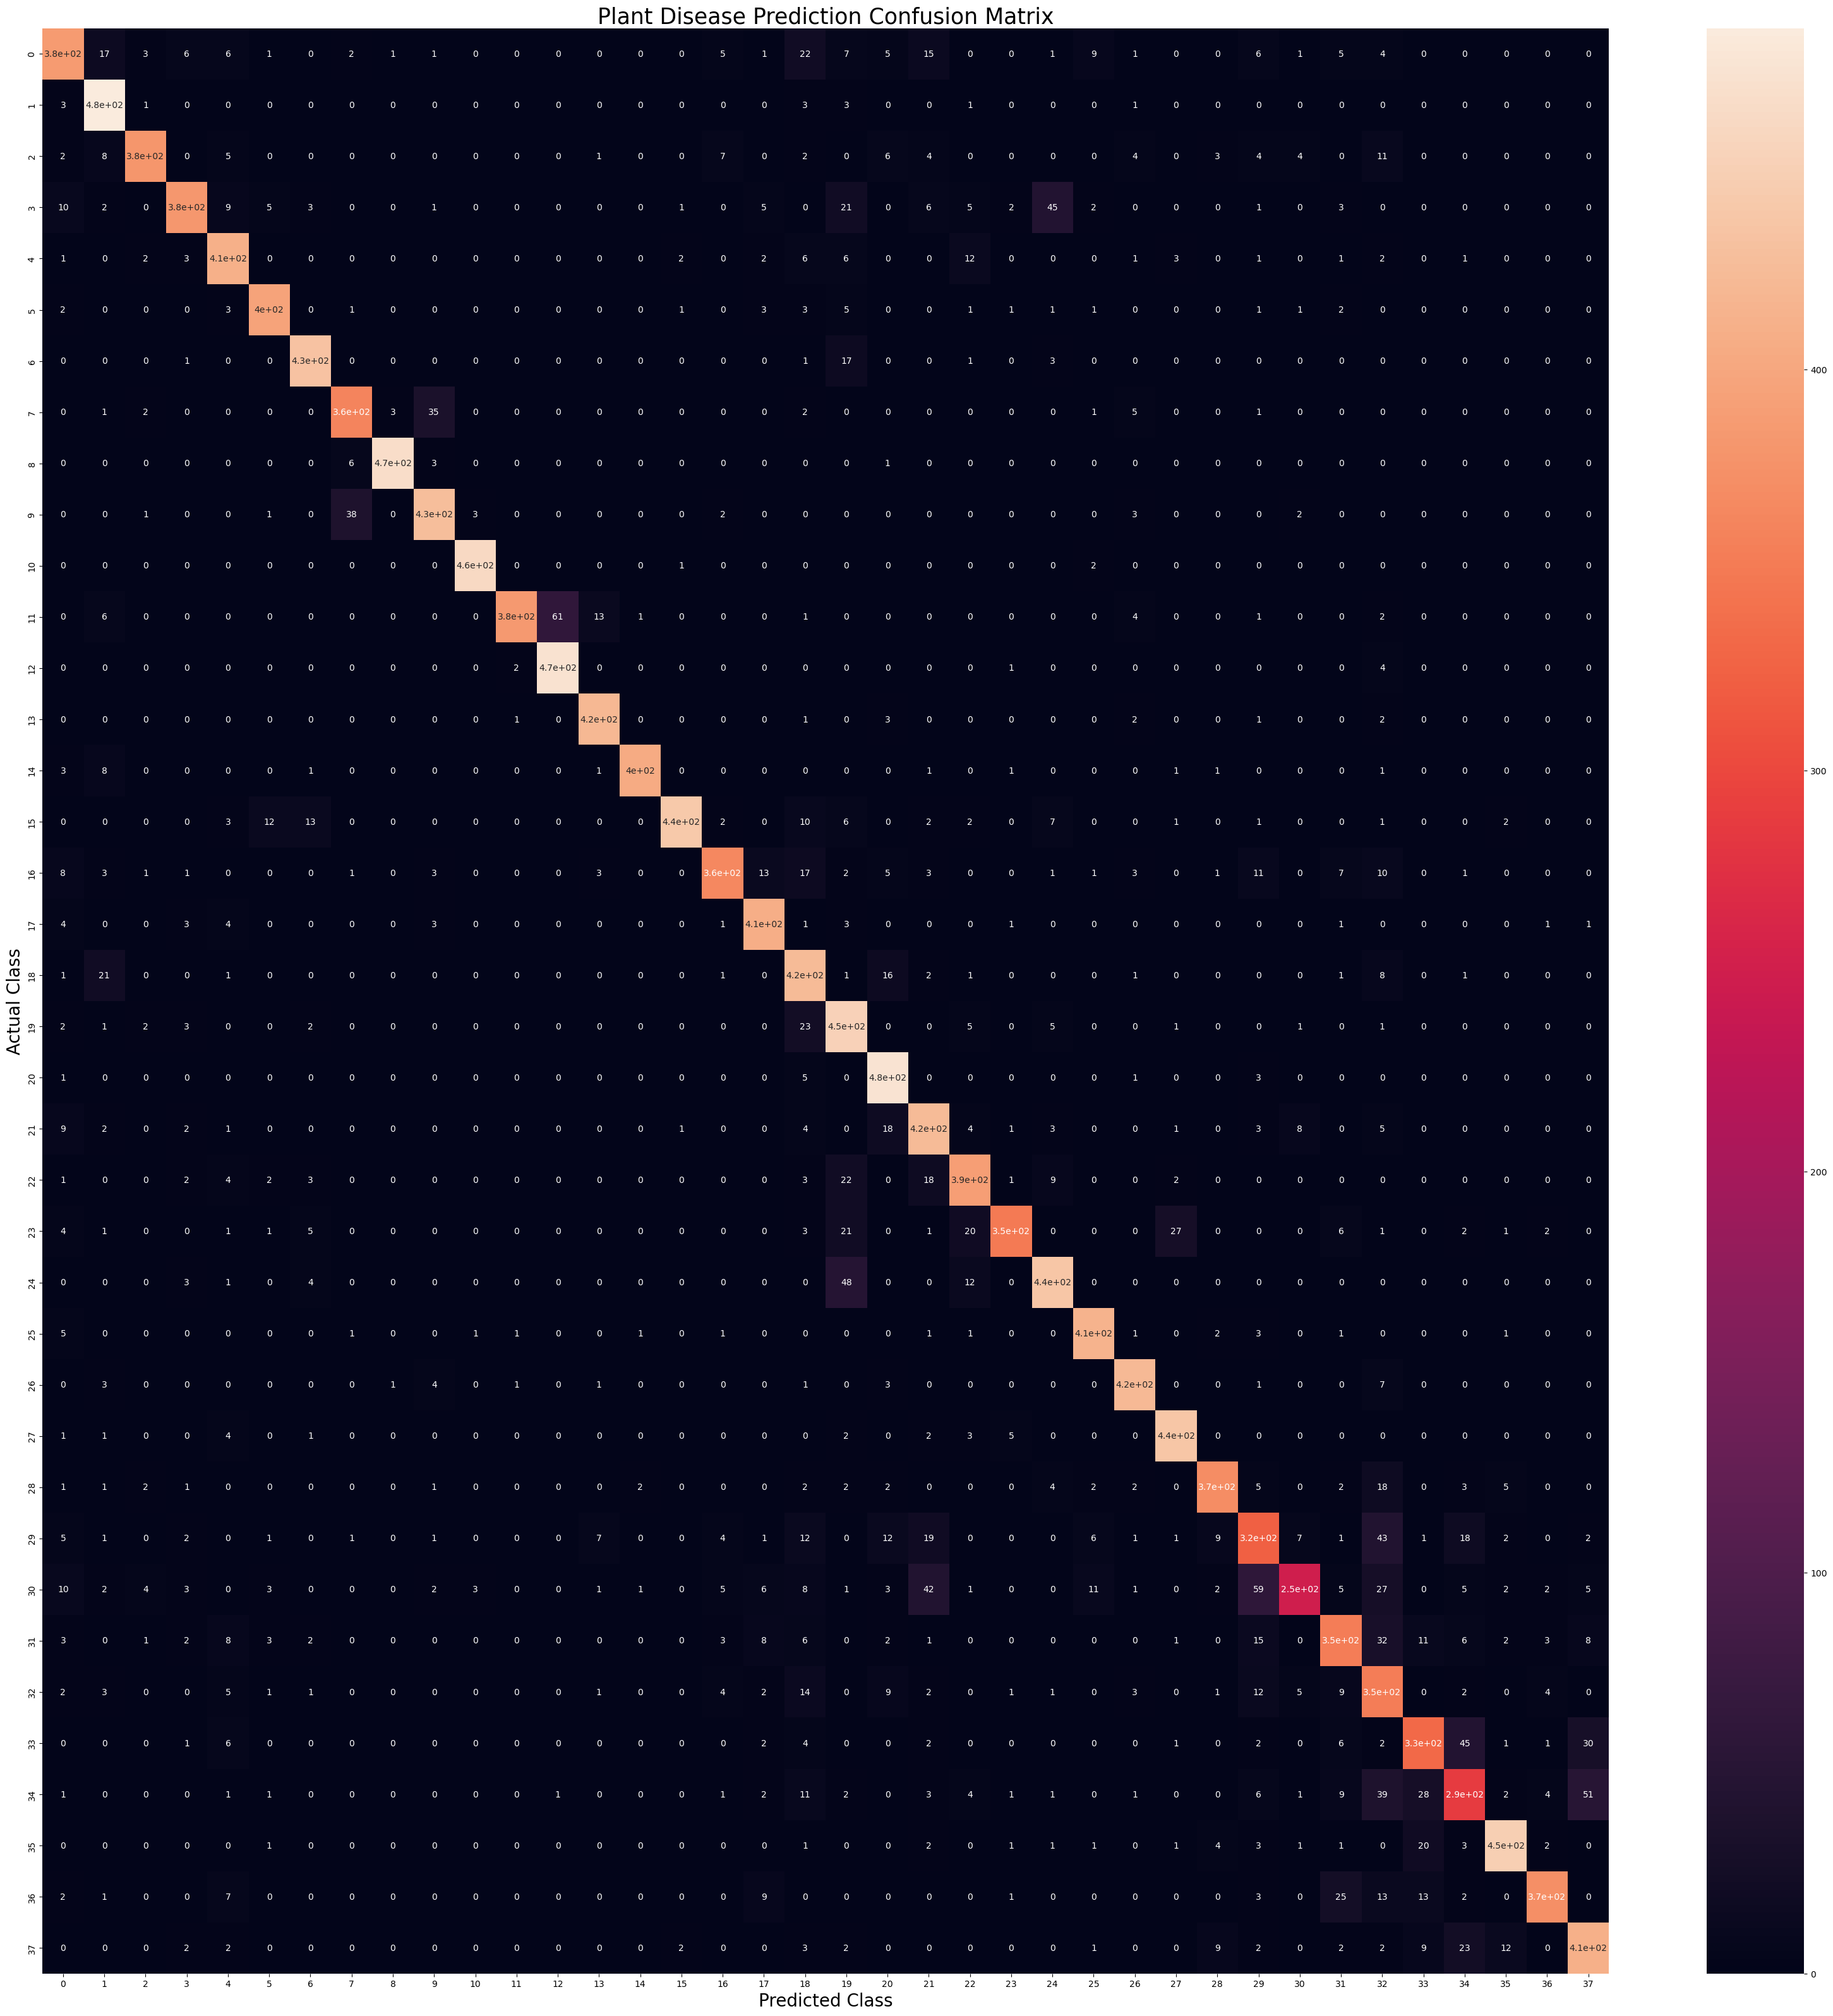

In [160]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()